In [1]:
from super_gradients.training import models
import cv2
from futstats.annotations.anns import Detection
import matplotlib.pyplot as plt
from super_gradients.training.processing import DetectionCenterPadding, StandardizeImage, NormalizeImage, ImagePermute, ComposeProcessing, DetectionLongestMaxSizeRescale

/home/fer/miniconda3/envs/futstats/lib/python3.10/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11060). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
[2023-10-08 01:22:27] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-10-08 01:22:27] WARNING - __init__.py - Failed to import pytorch_quantization


The console stream is logged into /home/fer/sg_logs/console.log


[2023-10-08 01:22:28] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-10-08 01:22:28] WARNING - export.py - Failed to import pytorch_quantization
[2023-10-08 01:22:28] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [8]:
import torch
torch.cuda.is_available()

False

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
CLASSES = [
    "0",
    "1",
    "10",
    "11",
    "12",
    "13",
    "14",
    "15",
    "16",
    "17",
    "18",
    "19",
    "2",
    "20",
    "21",
    "22",
    "23",
    "24",
    "25",
    "26",
    "27",
    "28",
    "3",
    "4",
    "5",
    "6",
    "7",
    "8",
    "9",
]

NUM_CLASES = len(CLASSES)

In [16]:
cktp_path = "./checkpoints/FIELD_KEYPOINTS_COCO/ckpt_best.pth"

model = models.get("yolo_nas_s",
                num_classes=NUM_CLASES,
                checkpoint_path=cktp_path)


model.set_dataset_processing_params(
    image_processor = ComposeProcessing(
    [
        DetectionLongestMaxSizeRescale(output_shape=(636, 636)),
        DetectionCenterPadding(output_shape=(640, 640), pad_value=114),
        StandardizeImage(max_value=255.0),
        ImagePermute(permutation=(2, 0, 1)),
    ]
)
)

[2023-10-08 01:01:09] INFO - checkpoint_utils.py - Successfully loaded model weights from ./checkpoints/FIELD_KEYPOINTS_COCO/ckpt_best.pth EMA checkpoint.


In [17]:
img = cv2.cvtColor(cv2.imread('../images/frame.png'), cv2.COLOR_BGR2RGB)
field = cv2.cvtColor(cv2.imread('../images/field_2d.jpg'), cv2.COLOR_BGR2RGB)

In [19]:

results = list(model.predict(img, conf=0.25))[0]
detections = Detection.from_yoloNas(pred=results)

/home/fer/miniconda3/envs/futstats/lib/python3.10/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
[2023-10-08 01:01:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


[Detection(rect=Rect(x=135.21597290039062, y=317.9083251953125, width=22.904144287109375, height=22.10809326171875), class_id=13, class_name='12', confidence=0.8015605211257935, tracker_id=None, color=None), Detection(rect=Rect(x=979.6541748046875, y=284.94183349609375, width=22.79144287109375, height=22.356689453125), class_id=3, class_name='2', confidence=0.789099931716919, tracker_id=None, color=None), Detection(rect=Rect(x=7.862455368041992, y=374.8666076660156, width=24.02288246154785, height=22.8001708984375), class_id=17, class_name='16', confidence=0.7605201005935669, tracker_id=None, color=None), Detection(rect=Rect(x=959.2022705078125, y=384.875244140625, width=22.67608642578125, height=22.13232421875), class_id=19, class_name='18', confidence=0.749972939491272, tracker_id=None, color=None), Detection(rect=Rect(x=934.9432983398438, y=505.56011962890625, width=21.6639404296875, height=21.94091796875), class_id=20, class_name='19', confidence=0.7422624826431274, tracker_id=None

[Detection(rect=Rect(x=135.21597290039062, y=317.9083251953125, width=22.904144287109375, height=22.10809326171875), class_id=13, class_name='12', confidence=0.8015605211257935, tracker_id=None, color=None), Detection(rect=Rect(x=979.6541748046875, y=284.94183349609375, width=22.79144287109375, height=22.356689453125), class_id=3, class_name='2', confidence=0.789099931716919, tracker_id=None, color=None), Detection(rect=Rect(x=7.862455368041992, y=374.8666076660156, width=24.02288246154785, height=22.8001708984375), class_id=17, class_name='16', confidence=0.7605201005935669, tracker_id=None, color=None), Detection(rect=Rect(x=959.2022705078125, y=384.875244140625, width=22.67608642578125, height=22.13232421875), class_id=19, class_name='18', confidence=0.749972939491272, tracker_id=None, color=None), Detection(rect=Rect(x=934.9432983398438, y=505.56011962890625, width=21.6639404296875, height=21.94091796875), class_id=20, class_name='19', confidence=0.7422624826431274, tracker_id=None

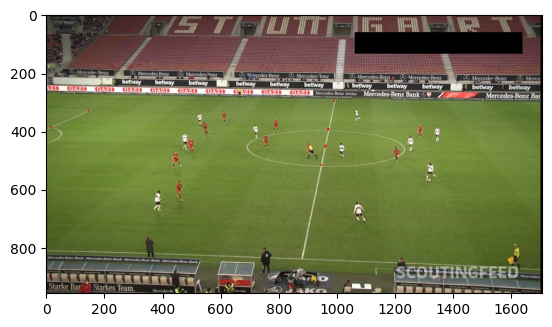

In [8]:

points = img.copy()

for detection in detections:
    x2, y2 = detection.rect.bottom_right.int_xy_tuple
    x1, y1 = detection.rect.top_left.int_xy_tuple
    # get the center of the box
    center = (int((x1 + x2) / 2),int((y1 + y2) / 2))
    points = cv2.circle(points, center, 3, (255, 0, 0), -1)


plt.imshow(points)